# Regression with a Tabular Gemstone Price Dataset

<img src="https://titcombebespoke.co.uk/wp-content/uploads/7-20ct-royal-blue-cushion-sapphire-no-heat-treatment-loose-gemstone.jpg" width="400">

**In this project**, the goal is to predict the **price** of gemstones from their tabular attributes.  
The dataset is from a **Kaggle Playground Series** competition, and the task is a **regression problem** where the target variable is **`price`**.  
It was synthetically generated from a model trained on a real gemstone dataset, so feature distributions are close—but not identical—to the original.

---

## Features Description

- `id` : Unique identifier for each observation
- `carat` : Stone weight in carats (continuous)
- `cut` : Cut quality (categorical: Fair, Good, Very Good, Premium, Ideal)
- `color` : Color grade (categorical letters)
- `clarity` : Clarity grade (categorical: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)
- `depth` : Total depth percentage (continuous)
- `table` : Table width percentage (continuous)
- `x` : Length (mm, continuous)
- `y` : Width (mm, continuous)
- `z` : Depth (mm, continuous)
- `price` : **Target variable** (numeric)

---

The dataset was taken from Kaggle:

[Kaggle | Regression with a Tabular Gemstone Price Dataset](https://www.kaggle.com/competitions/playground-series-s3e8/overview)


## Data Read

In [1]:
import pandas as pd 

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

## EDA - Exploratory Data Analysis

In [3]:
train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
train.tail()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681
193572,193572,0.71,Good,E,SI2,60.8,64.0,5.73,5.71,3.48,2258


In [5]:
train.sample(3)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
47662,47662,1.02,Very Good,H,SI1,62.7,58.0,6.38,6.45,4.02,4404
51179,51179,0.35,Ideal,F,VS2,62.5,57.0,4.47,4.52,2.81,906
119932,119932,0.50,Premium,D,VS2,59.6,57.0,5.10,5.14,3.06,1813


In [6]:
train.shape

(193573, 11)

In [7]:
train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [9]:
train.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [10]:
train['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [11]:
train['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [12]:
train['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
train['cut']=le.fit_transform(train['cut'])
train['color']=le.fit_transform(train['color'])
train['clarity']=le.fit_transform(train['clarity'])

In [16]:
train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,3,2,5,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,4,6,3,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,2,3,4,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,2,3,4,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,3,3,5,62.6,59.0,7.65,7.61,4.77,14453


In [17]:
test['cut']=le.fit_transform(test['cut'])
test['color']=le.fit_transform(test['color'])
test['clarity']=le.fit_transform(test['clarity'])

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='price', ylabel='Count'>

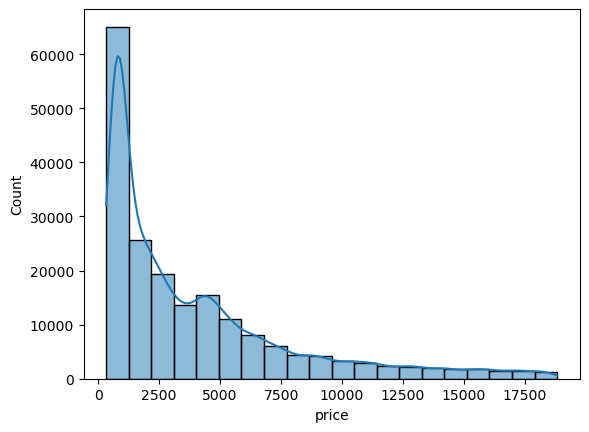

In [19]:
sns.histplot(train['price'], bins=20, kde=True)

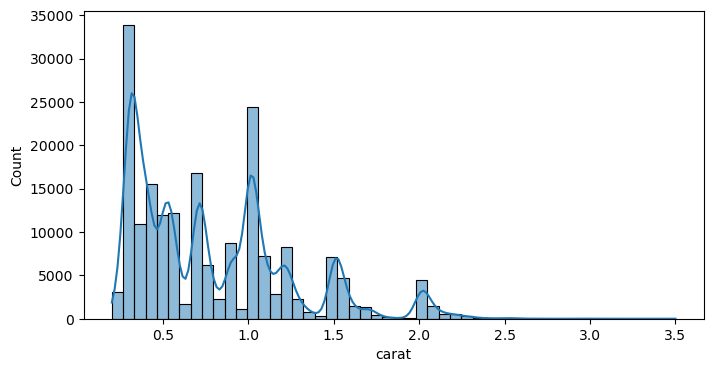

In [20]:
plt.figure(figsize=(8,4))
sns.histplot(data=train, x='carat', bins=50, kde=True);

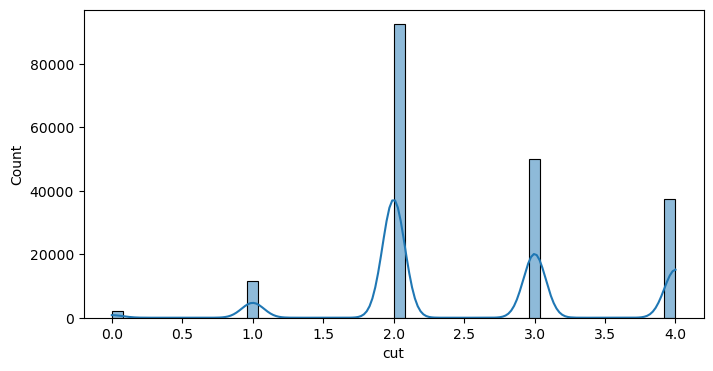

In [21]:
plt.figure(figsize=(8,4))
sns.histplot(data=train, x='cut', bins=50, kde=True);

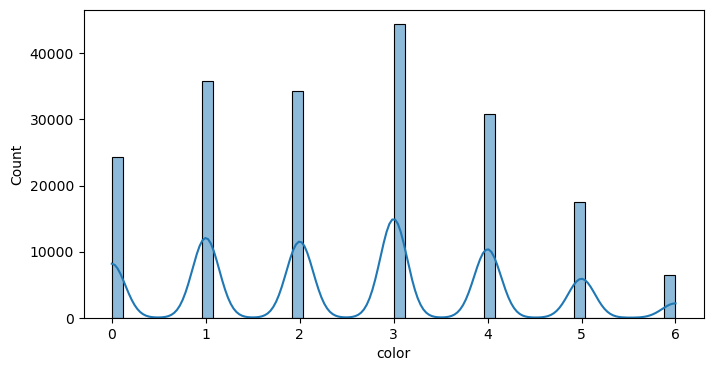

In [22]:
plt.figure(figsize=(8,4))
sns.histplot(data=train, x='color', bins=50, kde=True);

<Axes: >

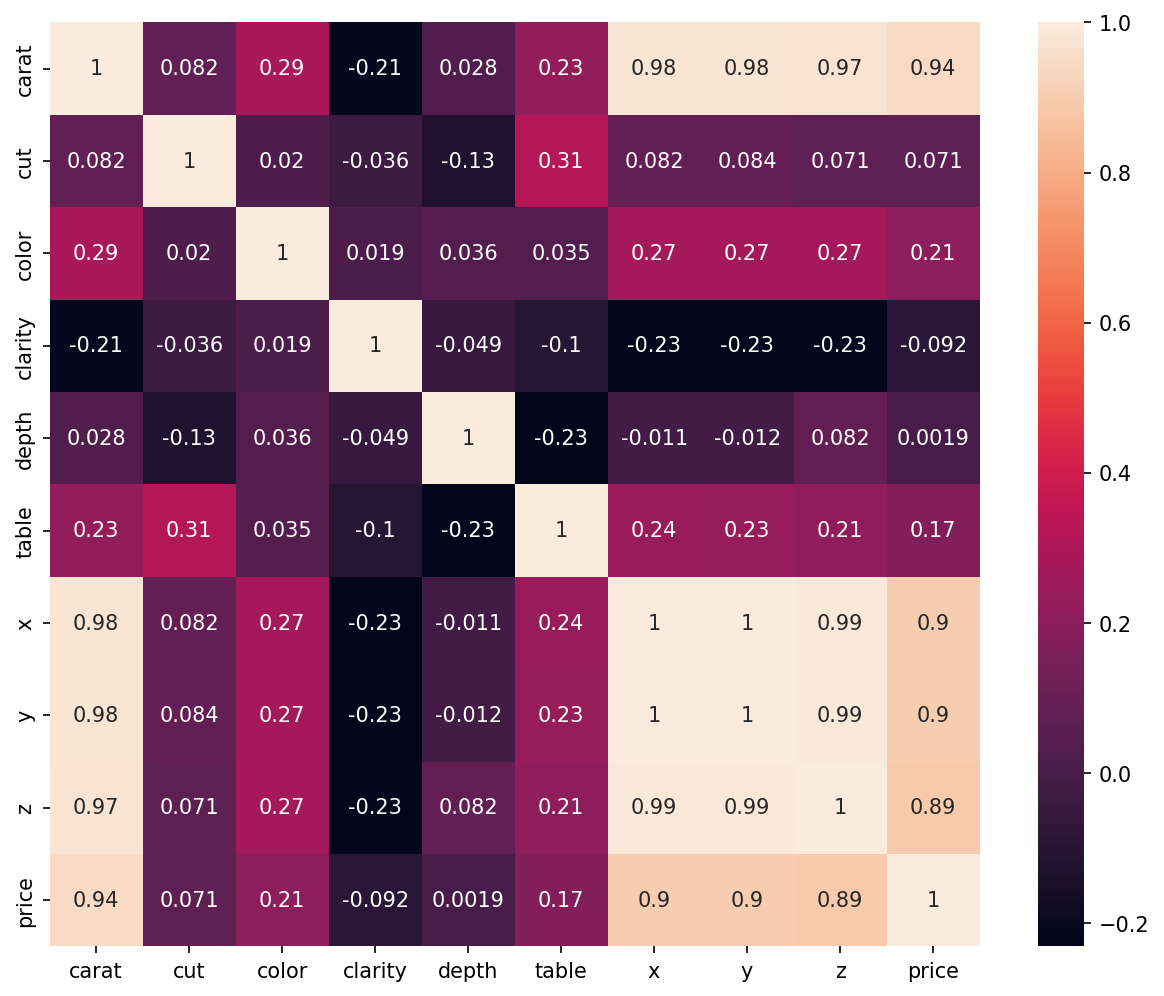

In [23]:
plt.figure(figsize=(10,8), dpi=150)
sns.heatmap(train.drop(columns=['id']).corr(numeric_only=True), annot=True)

In [24]:
abs(train.corr(numeric_only=True)['price'].sort_values(ascending=False)) 

price      1.000000
carat      0.943396
y          0.901033
x          0.901004
z          0.893037
color      0.210859
table      0.174915
cut        0.070953
depth      0.001880
id         0.001392
clarity    0.092149
Name: price, dtype: float64

## Modelling

In [25]:
x = train.drop(columns=['id', 'price']) 
y = train['price']

In [29]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def algo_test(x,y):
            
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()

        algos=[L,R,Lass,E]
        algo_names=['Linear','Ridge','Lasso','ElasticNet']

        x=MinMaxScaler().fit_transform(x)
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable


In [30]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Linear,0.925061,1100.446476,706.834317
Ridge,0.924989,1100.975498,708.175164
Lasso,0.924266,1106.266393,718.189931
ElasticNet,0.144527,3718.075889,2799.380121


## Conclusion

In this project, several regression algorithms were applied to predict the **price of gemstones** based on their physical and categorical features.

Among the tested models — **Linear Regression**, **Ridge**, **Lasso**, and **ElasticNet** —  
the **Linear Regression model** achieved the highest performance with an **R² score of approximately 0.93**,  
indicating that it explains most of the variation in gemstone prices.

The results show that **carat**, **x**, **y**, and **z** dimensions are the strongest predictors of price,  
while categorical features like **cut**, **color**, and **clarity** contribute less but still improve overall accuracy.

Future improvements could include:
- Feature engineering (e.g., combining `x`, `y`, `z` into a volume feature)  
- Outlier removal and log transformation of skewed variables  
- Testing advanced ensemble methods (e.g., XGBoost, CatBoost)

Overall, the model provides reliable predictions and demonstrates how linear-based regressors can effectively model gemstone pricing patterns.
